In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load the cleaned dataset
file_path = "../data/cleaned_cognitive_decline.csv"
df_cleaned = pd.read_csv(file_path)

In [3]:
# get the first few rows
df_cleaned.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,StratificationCategory2,Stratification2,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2022,2022,AZ,Arizona,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,Gender,Female,C06,TCC02,Q31,4,AGE,AGE_OVERALL,GENDER,FEMALE
1,2022,2022,AZ,Arizona,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,Race/Ethnicity,Hispanic,C06,TCC02,Q31,4,AGE,5064,RACE,HIS
2,2022,2022,AZ,Arizona,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,Race/Ethnicity,"White, non-Hispanic",C06,TCC02,Q31,4,AGE,65PLUS,RACE,WHT
3,2022,2022,AZ,Arizona,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,Race/Ethnicity,Native Am/Alaskan Native,C06,TCC02,Q31,4,AGE,65PLUS,RACE,NAA
4,2022,2022,AZ,Arizona,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,Race/Ethnicity,"Black, non-Hispanic",C06,TCC02,Q31,4,AGE,AGE_OVERALL,RACE,BLK


In [4]:
# getting the basic info
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22182 entries, 0 to 22181
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  22182 non-null  int64  
 1   YearEnd                    22182 non-null  int64  
 2   LocationAbbr               22182 non-null  object 
 3   LocationDesc               22182 non-null  object 
 4   Datasource                 22182 non-null  object 
 5   Class                      22182 non-null  object 
 6   Topic                      22182 non-null  object 
 7   Question                   22182 non-null  object 
 8   Data_Value_Unit            22182 non-null  object 
 9   DataValueTypeID            22182 non-null  object 
 10  Data_Value_Type            22182 non-null  object 
 11  Data_Value                 22182 non-null  float64
 12  Data_Value_Alt             22182 non-null  float64
 13  Low_Confidence_Limit       22182 non-null  flo

## 1. Trend Analysis - How Has Cognitive Decline Changed Over Time?

- Visualize the trend of cognitive decline from 2015 to 2022
- The column `Data_Value` represents the percentage of people reporting cognitive decline.

### 1.1 Aggregate Data by Year

**Concept Explanation**
- Since there are multiple data points per year, calculate the average `Data_Value` per year.
- This helps in smoothing out fluctuations.

In [5]:
# group by year and calculate the average Data_Value
yearly_trend = df_cleaned.groupby("YearStart")["Data_Value"].mean().reset_index()

# display the trend data
print(yearly_trend)

   YearStart  Data_Value
0       2015   32.451497
1       2016   32.221516
2       2017   31.637730
3       2018   31.297475
4       2019   31.898509
5       2020   31.716173
6       2021   32.199400
7       2022   31.666103


### 1.2 Plot the Trend

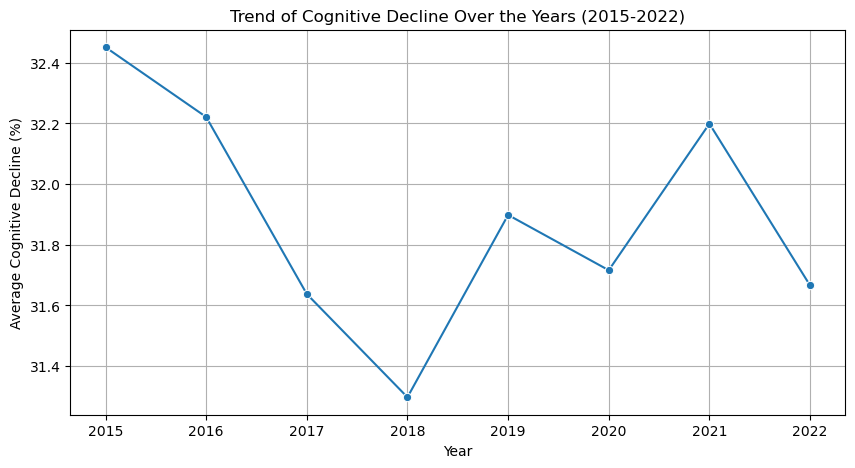

In [6]:
# plot the trend over time
plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_trend, x="YearStart", y="Data_Value",
             marker="o", linestyle="-")

# add labels and title
plt.xlabel("Year")
plt.ylabel("Average Cognitive Decline (%)")
plt.title("Trend of Cognitive Decline Over the Years (2015-2022)")
plt.grid(True)
plt.show()